In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=load_breast_cancer()
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# threshold = 0.7

# # dropping columns with missing value rate higher than threshold
# dataset = dataset[dataset.columns[dataset.isnull().mean() < threshold]]

In [5]:
dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
worst_concaveps=dataset['worst concave points']
worst_radius=dataset['worst radius']
worst_perimeter=dataset['worst perimeter']
mean_concaveps=dataset['mean concave points']
mean_perimeter=dataset['mean perimeter']
mean_radius=dataset['mean radius']
worst_area=dataset['worst area']
mean_concavity=dataset['mean concavity']
mean_area=dataset['mean area']
worst_concave=dataset['worst concavity']
worst_texture=dataset['worst texture']


In [7]:
dataset.shape

(569, 30)

In [8]:
#diagonsis is the one we are going to predict
dataset['Diagnosis']=df.target
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
dataset.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Diagnosis'],
      dtype='object')

# Exploratory Data Analysis (EDA) 

In [10]:
dataset.head()
dataset['worst radius']

0      25.380
1      24.990
2      23.570
3      14.910
4      22.540
        ...  
564    25.450
565    23.690
566    18.980
567    25.740
568     9.456
Name: worst radius, Length: 569, dtype: float64

In [11]:
dataset.shape

(569, 31)

In [37]:
dataset['worst radius'].tail()

564    25.450
565    23.690
566    18.980
567    25.740
568     9.456
Name: worst radius, dtype: float64

<IPython.core.display.Javascript object>

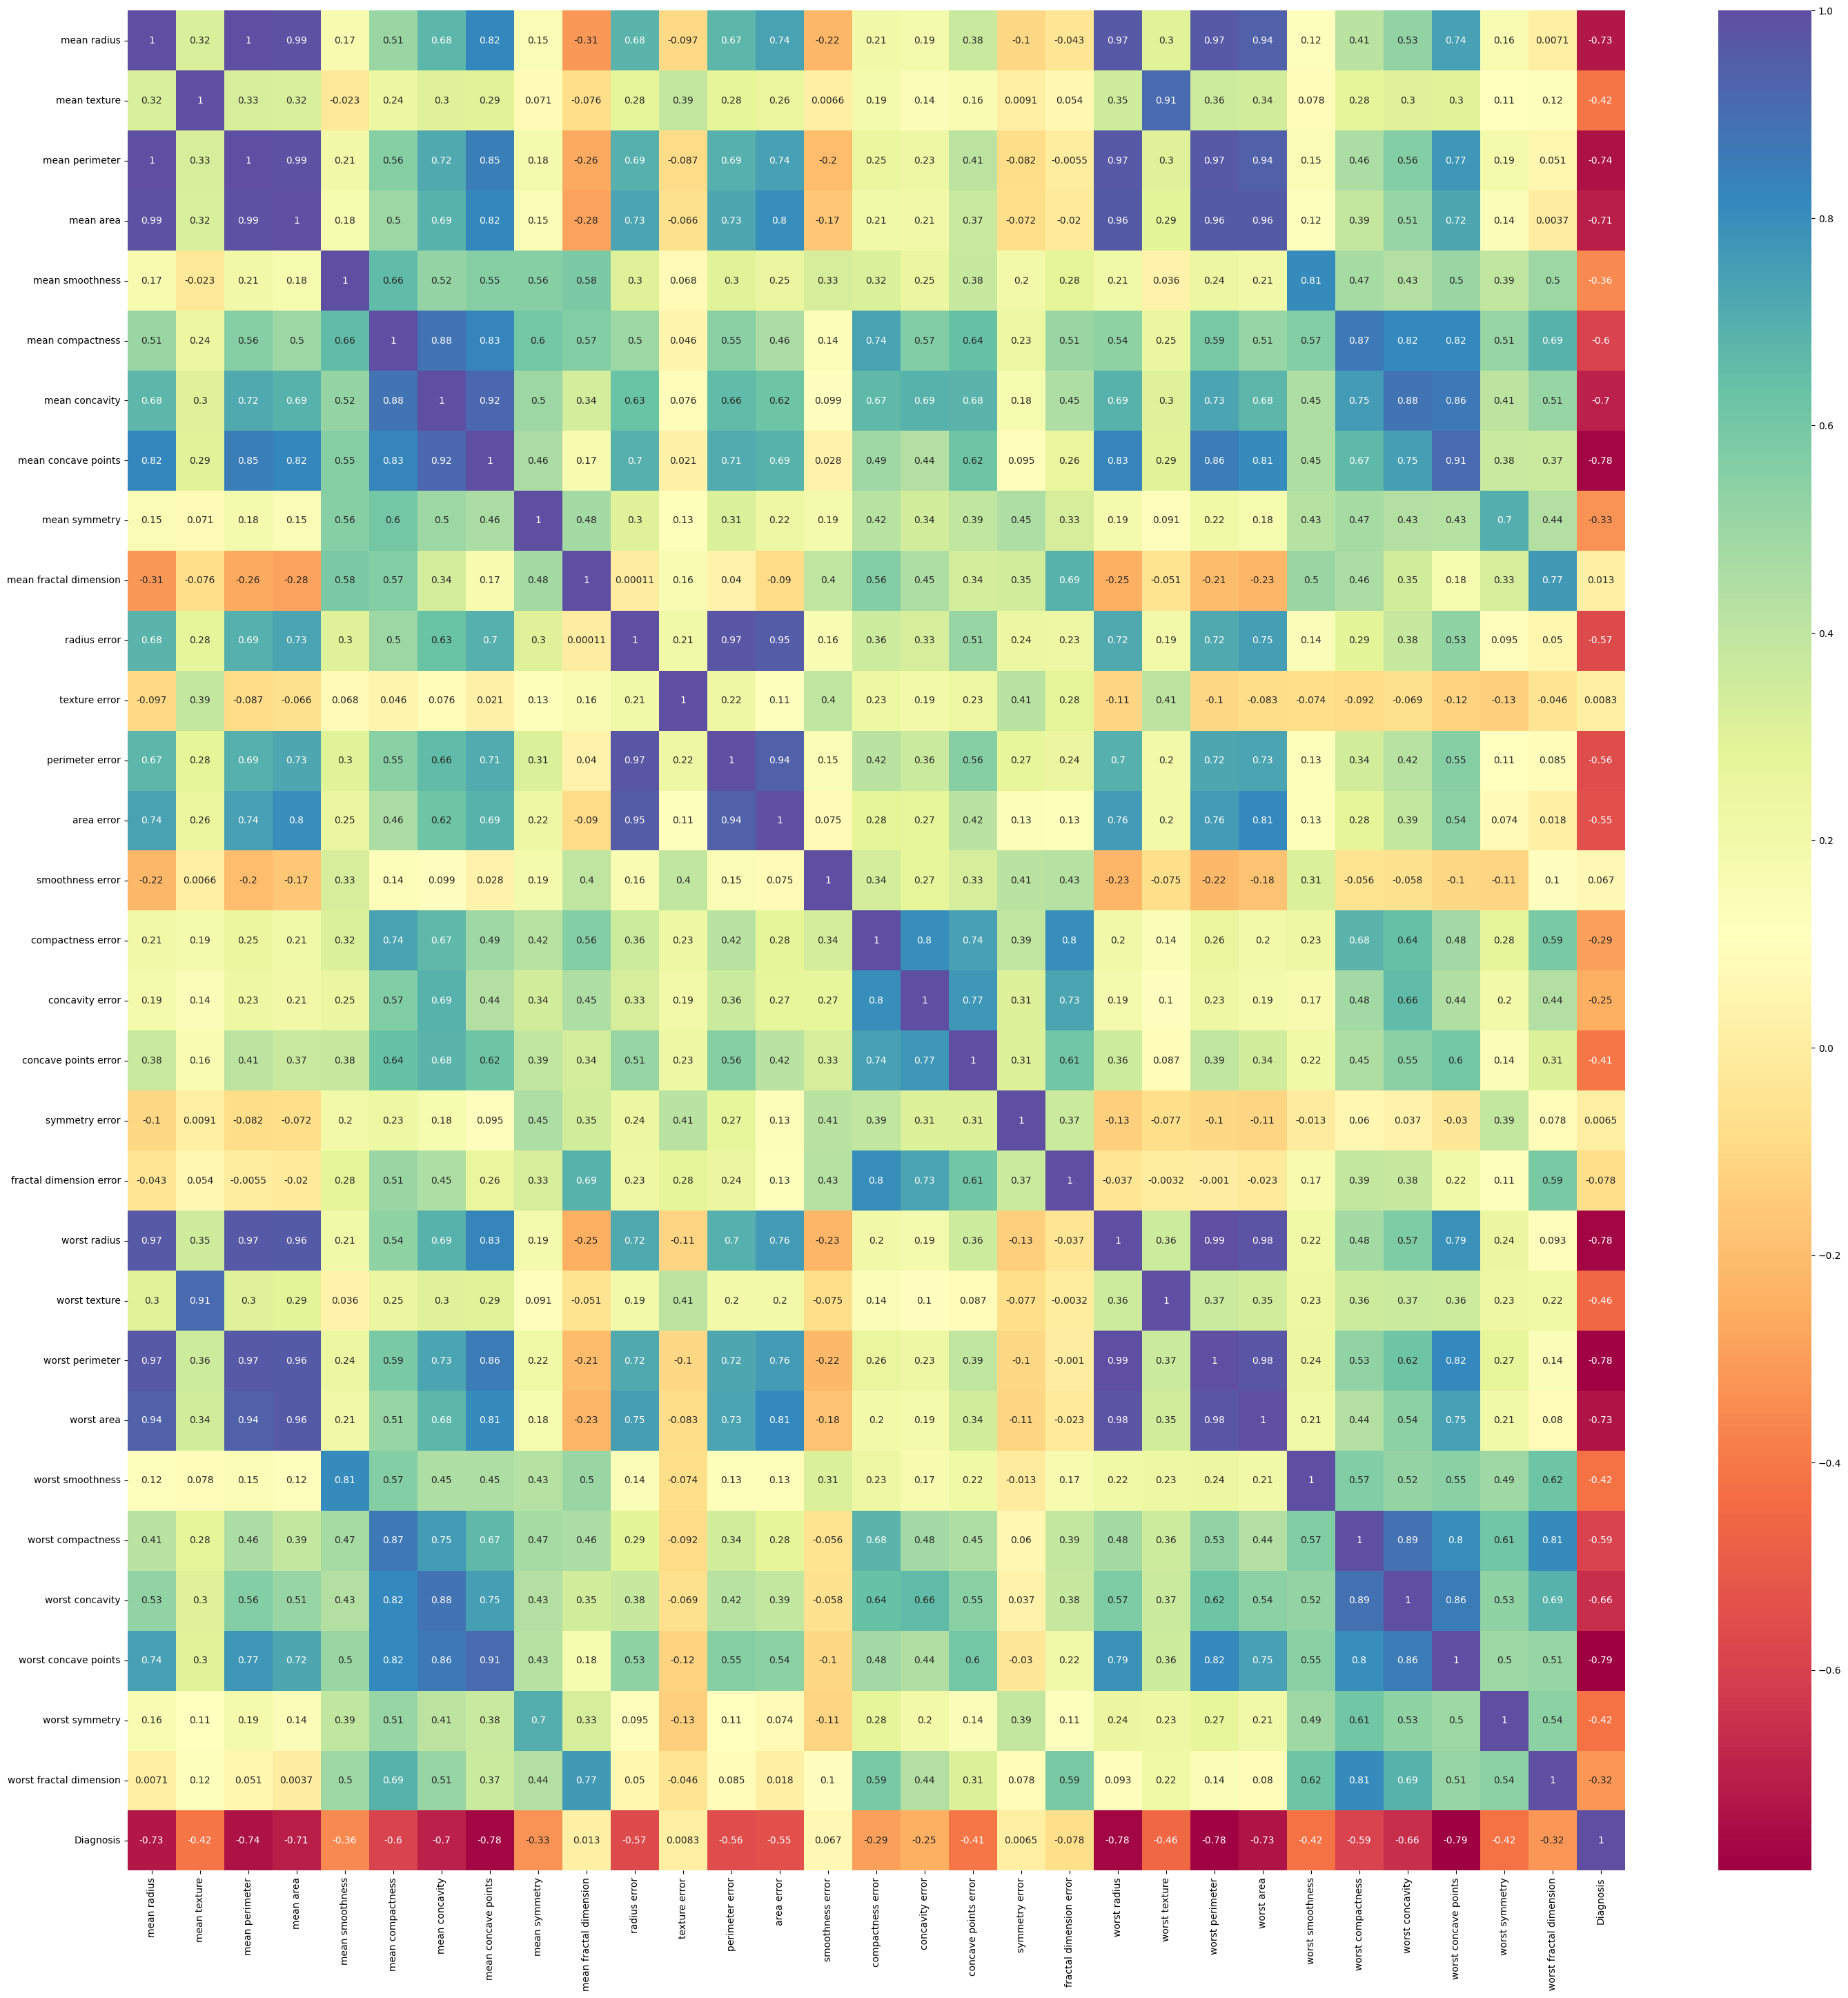

In [13]:
# Correlation between all the variables 

#closer the value to one it is more positive corrleated
#closer the value to one it is more negatively corrleated
plt.figure(figsize=(35,35))
sns.heatmap(dataset.corr(),annot=True,cmap=('Spectral'))
plt.show()

<IPython.core.display.Javascript object>

<Axes: xlabel='mean radius', ylabel='mean texture'>

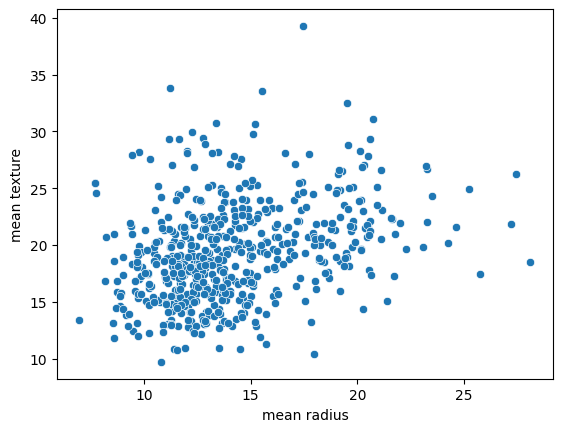

In [14]:
sns.scatterplot(x='mean radius',y='mean texture',data=dataset)
# sns.scatterplot(x='mean radius',y='worst symmetry',data=dataset)

<IPython.core.display.Javascript object>

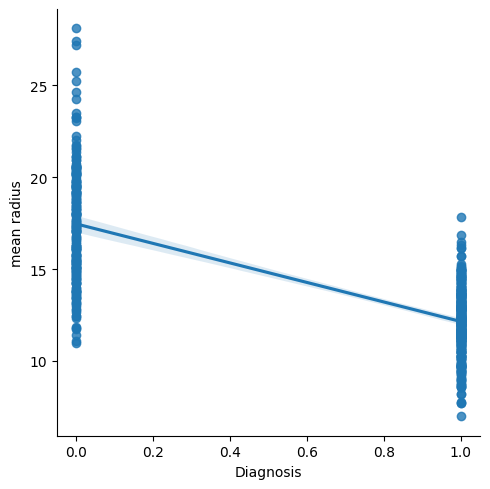

In [15]:
sns.lmplot(y='mean radius',x='Diagnosis',data=dataset)

<IPython.core.display.Javascript object>

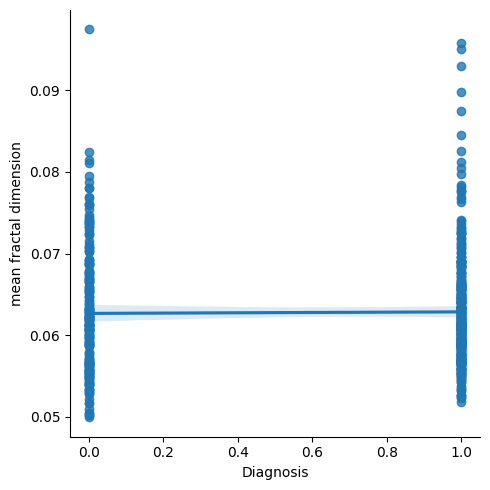

In [16]:
sns.lmplot(y='mean fractal dimension',x='Diagnosis',data=dataset)

<IPython.core.display.Javascript object>

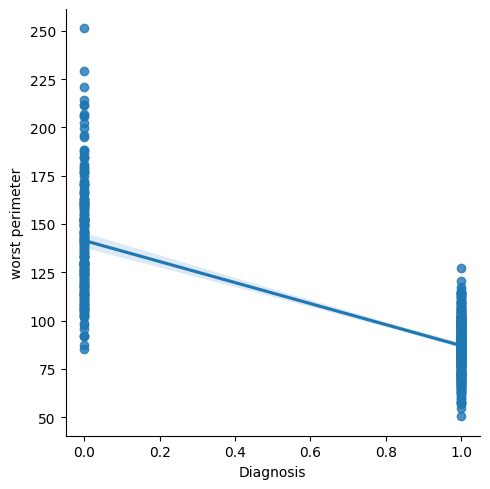

In [17]:
sns.lmplot(y='worst perimeter',x='Diagnosis',data=dataset)

<IPython.core.display.Javascript object>

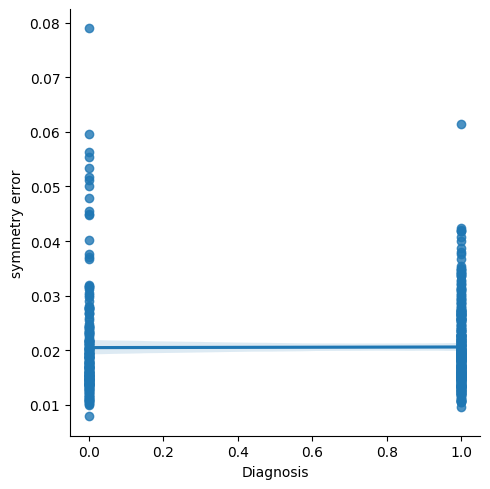

In [18]:
sns.lmplot(y='symmetry error', x='Diagnosis',data=dataset)

In [19]:
X=dataset.loc[:,['worst concave points','worst radius','worst perimeter','mean concave points','mean perimeter','mean radius','worst area','mean concavity','mean area','worst concavity','worst texture']] ##independent features are other features as they are not dependent upon anyone 
y=dataset.iloc[:,-1] ## Dependent features are price as they are dependent on other values
# y.head()
X.head()

,worst concave points,worst radius,worst perimeter,mean concave points,mean perimeter,mean radius,worst area,mean concavity,mean area,worst concavity,worst texture
0,0.2654,25.38,184.60,0.14710,122.80,17.99,2019.0,0.3001,1001.0,0.7119,17.33
1,0.1860,24.99,158.80,0.07017,132.90,20.57,1956.0,0.0869,1326.0,0.2416,23.41
2,0.2430,23.57,152.50,0.12790,130.00,19.69,1709.0,0.1974,1203.0,0.4504,25.53
3,0.2575,14.91,98.87,0.10520,77.58,11.42,567.7,0.2414,386.1,0.6869,26.50
4,0.1625,22.54,152.20,0.10430,135.10,20.29,1575.0,0.1980,1297.0,0.4000,16.67


In [20]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# # Two features with highest chi-squared statistics are selected
# chi2_features = SelectKBest(chi2, k = 15)
# X_kbest_features = chi2_features.fit_transform(X, y)
  
# # Reduced features
# print('Original feature number:', X.shape[1])
# print('Reduced feature number:', X_kbest_features.shape[1])
# df=X_kbest_features
# df1=pd.DataFrame(df)
# # print(df1.to_string())

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [22]:
#Feature importance refers to techniques that assign a score to input features
#based on how useful they are at predicting a target variable.

print(selection.feature_importances_)

[0.1896657  0.12217973 0.14267053 0.14691678 0.06985221 0.0469941
 0.09160604 0.03890249 0.04804085 0.04876864 0.05440294]


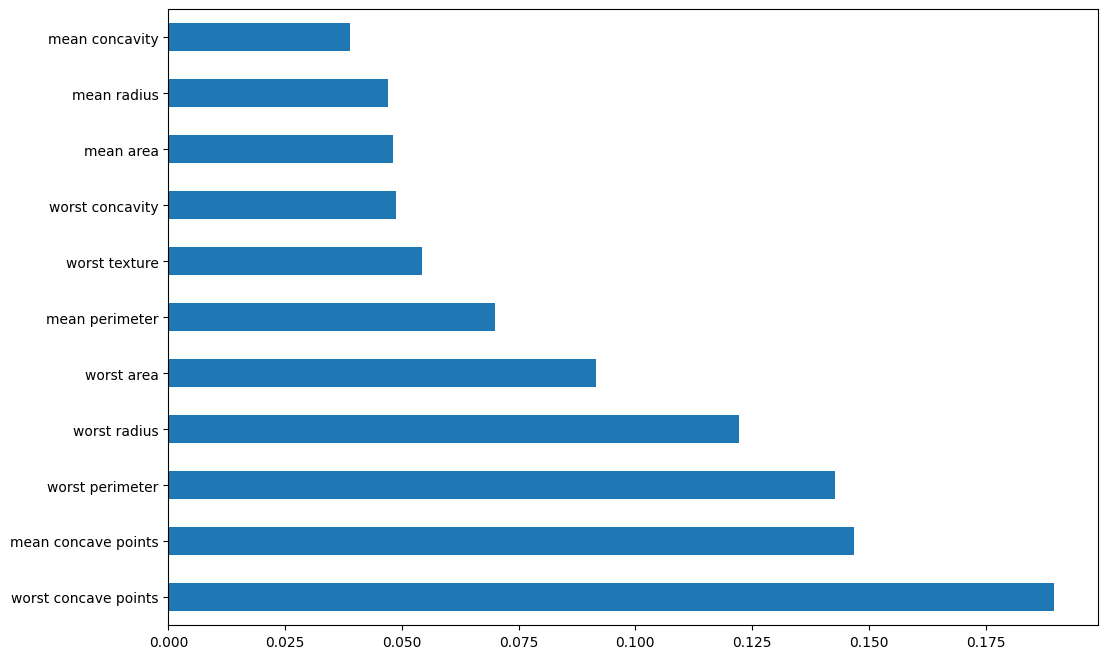

In [23]:
#plot grap to feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importance = pd.Series(selection.feature_importances_,index = X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

#from the graph we can see worst concave points, worst radius, worst perimeter, mean perimeter, and others are the most important features

# Fitting Model using Logistic Regession

In [24]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

In [25]:
# feature Scaling

from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)
# print(X_train)
# print("############")
# print(X_test)

In [26]:
#fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression
reg_lr = LogisticRegression()
reg_lr.fit(X_train,y_train)

LogisticRegression()

In [27]:
#Predicting the test set Result
y_pred = reg_lr.predict(X_test)
print(y_pred)

[1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0
 1 1 1]


In [28]:
#Test Accuracy of the result

#creating the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[40  0]
 [ 5 69]]


In [29]:
print(reg_lr.score(X_test,y_test))
print(reg_lr.score(X_train,y_train))

0.956140350877193
0.9802197802197802


<IPython.core.display.Javascript object>

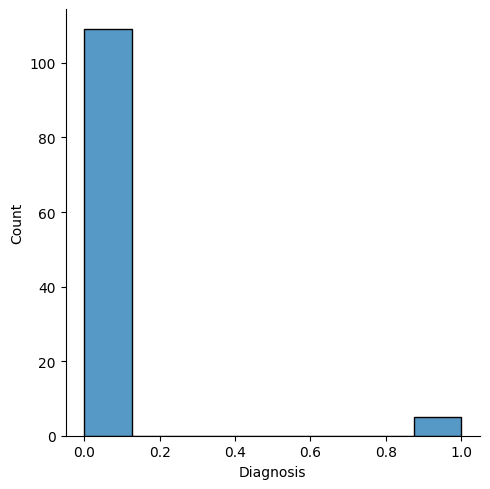

In [30]:
sns.displot(y_test-y_pred)
plt.show()

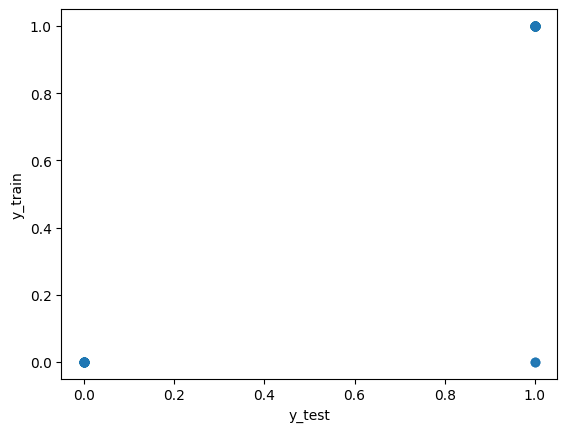

In [31]:
plt.scatter(y_test,y_pred, alpha= 0.5)
plt.xlabel('y_test')
plt.ylabel('y_train')
plt.show()

In [32]:
columns=dataset.columns

In [33]:
accuracy=reg_lr.score(X_train,y_train)
accuracy

0.9802197802197802

# Save the model to reuse it again

In [34]:
# import pickle
# # open a file where you want to store the data

# file = open('flight_rf.pkl','wb') as files:

# #dump information to that file
# pickle.dump(reg_rt,file)

# worst_concaveps=dataset['worst concave points']
# worst_radius=dataset['worst radius']
# worst_perimeter=dataset['worst perimeter']
# mean_concaveps=dataset['mean concave points']
# mean_perimeter=dataset['mean perimeter']
# mean_radius=dataset['mean radius']
# worst_area=dataset['worst area']
# mean_concavity=dataset['mean concavity']
# mean_area=dataset['mean area']
# worst_concave=dataset['worst concavity']
# worst_texture=dataset['worst texture']


# loading library
import pickle
with open('fpmodel_pkl', 'wb') as files:
    pickle.dump([reg_lr,accuracy,worst_concaveps,worst_radius,worst_perimeter,mean_concaveps,mean_perimeter,mean_radius,worst_area,mean_concavity,mean_area,worst_concave,worst_texture,columns], files)